# Task 1: Data Collection and Analysis

This notebook demonstrates the data collection and exploratory data analysis workflow.

In [1]:
# Import required modules
import sys
sys.path.append('../')

from src.customer_analytics.utils import PlayStoreScraper, ReviewPreprocessor
from src.customer_analytics.analysis import EDA
from src.customer_analytics.visualisation import Plotter
import pandas as pd

## Step 1: Data Collection

Scrape reviews from Google Play Store for Ethiopian banking apps.

In [2]:
# Initialize scraper
scraper = PlayStoreScraper()

# Scrape reviews from all banks
df_raw = scraper.scrape_all_banks()

# Display sample
print(f"\nCollected {len(df_raw)} reviews")
df_raw.head()

Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3192377
Total Ratings: 38870
Total Reviews: 8338

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1726847
Total Ratings: 6366
Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.168704
Total Ratings: 3915
Total Reviews: 773

App information saved to c:\BackUp\web-projects\tenx\customer-fintech-week2\notebooks\..\data\raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:04<00:09,  4.82s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:09<00:04,  4.65s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.47s/it]


Scraping Complete!

Total reviews collected: 1200
Reviews per bank:
  Commercial Bank of Ethiopia: 400
  Bank of Abyssinia: 400
  Dashen Bank: 400

Data saved to: c:\BackUp\web-projects\tenx\customer-fintech-week2\notebooks\..\data\raw\reviews_raw.csv

Collected 1200 reviews


,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


## Step 2: Data Preprocessing

Clean and preprocess the scraped data.

In [3]:
# Initialize preprocessor
preprocessor = ReviewPreprocessor()

# Run preprocessing pipeline
success = preprocessor.process()

if success:
    print("\n✓ Preprocessing completed successfully!")
    df_processed = preprocessor.df
else:
    print("\n✗ Preprocessing failed!")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_id: 277 (23.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-10-03 to 2025-11-29

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: c:\BackUp\web-projects\tenx\customer-fintech-week2\notebooks\..\data\processed\reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Bank of Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 735 (61.3%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 46 (3.8%)
  

## Step 3: Exploratory Data Analysis

Analyze the processed data to understand patterns and distributions.

In [4]:
# Initialize EDA
eda = EDA(df_processed)

# Generate summary report
print(eda.summary_report())

EXPLORATORY DATA ANALYSIS REPORT

Total Reviews: 1200

Reviews per Bank:
  Bank of Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating Distribution:
  ⭐⭐⭐⭐⭐: 735 (61.3%)
  ⭐⭐⭐⭐: 89 (7.4%)
  ⭐⭐⭐: 67 (5.6%)
  ⭐⭐: 46 (3.8%)
  ⭐: 263 (21.9%)

Average Rating: 3.82

Text Statistics:
  Average Length: 51 characters
  Median Length: 17 characters



In [5]:
# Get basic statistics
stats = eda.get_basic_stats()
print("\nBasic Statistics:")
for key, value in stats.items():
    if key not in ['columns', 'data_types', 'missing_values']:
        print(f"{key}: {value}")


Basic Statistics:
total_reviews: 1200
rating_distribution: {5: 735, 1: 263, 4: 89, 3: 67, 2: 46}
avg_rating: 3.8225
reviews_per_bank: {'Bank of Abyssinia': 400, 'Commercial Bank of Ethiopia': 400, 'Dashen Bank': 400}
avg_text_length: 51.071666666666665
median_text_length: 17.0


In [6]:
# Get top words
top_words = eda.get_top_words(n=20)
print("\nTop 20 Most Common Words:")
for word, count in top_words.items():
    print(f"  {word}: {count}")


Top 20 Most Common Words:
  app: 444
  good: 210
  bank: 131
  not: 127
  very: 107
  best: 97
  banking: 75
  nice: 65
  use: 62
  work: 50
  please: 49
  like: 48
  mobile: 47
  all: 46
  one: 45
  dashen: 45
  when: 44
  update: 41
  time: 40
  working: 40


## Step 4: Data Visualization

Create visualizations to better understand the data.

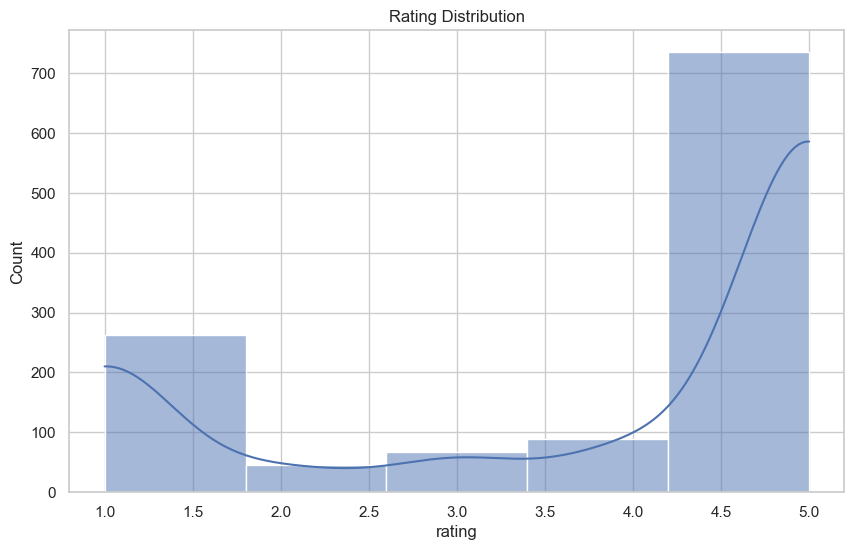

In [7]:
# Initialize plotter
plotter = Plotter()

# Plot rating distribution
plotter.plot_histogram(
    df_processed, 
    'rating', 
    title='Rating Distribution',
    bins=5
)

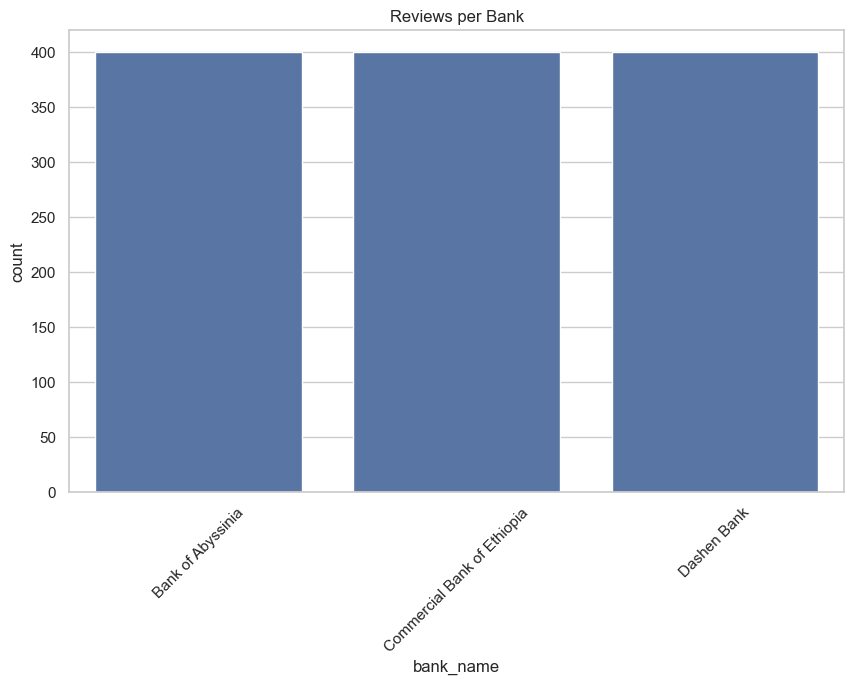

In [8]:
# Plot reviews by bank
bank_counts = df_processed['bank_name'].value_counts().reset_index()
bank_counts.columns = ['bank_name', 'count']

plotter.plot_bar(
    bank_counts,
    'bank_name',
    'count',
    title='Reviews per Bank'
)

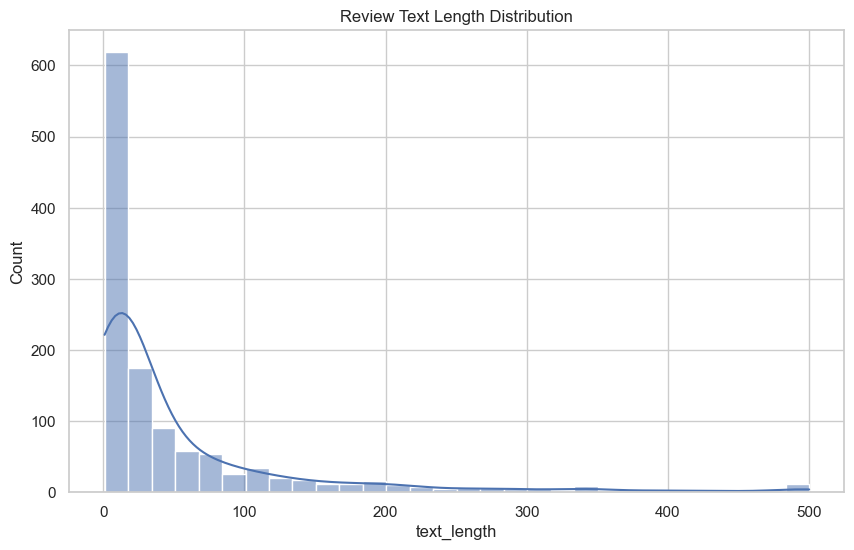

In [9]:
# Plot text length distribution
plotter.plot_histogram(
    df_processed,
    'text_length',
    title='Review Text Length Distribution',
    bins=30
)